In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from scipy.io import arff

In [71]:
def standardize(df: pd.DataFrame):
    res = df.copy()
    res.drop(res.columns[-1], axis=1, inplace=True)
    scaler = preprocessing.StandardScaler()

    num_df = res.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    res['class'] = df.iloc[:,-1]
    return res

def normalize(df: pd.DataFrame):
    res = df.copy()
    res.drop(res.columns[-1], axis=1, inplace=True)
    scaler = preprocessing.MinMaxScaler()

    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    res['class'] = df.iloc[:,-1]
    return res

In [190]:
data = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df_breast = pd.DataFrame(data)
df_breast = standardize(df_breast)
df_breast = df_breast.dropna(axis=0)

data = pd.read_csv("ecoli.csv", header=None)
df_ecoli = pd.DataFrame(data)
df_ecoli = standardize(df_ecoli)
df_ecoli.drop(df_ecoli.columns[0], axis=1, inplace=True)

data = pd.read_csv("glass.data", header=None)
df_glass = pd.DataFrame(data)
df_glass = standardize(df_glass)

data = pd.read_csv("seeds.csv", header=None)
df_seeds = pd.DataFrame(data)
df_seeds = standardize(df_seeds)

data = pd.read_csv("segmentation.data", header=None)
df_segmentation = pd.DataFrame(data)
df_segmentation = standardize(df_segmentation)
# shift column 'Name' to first position
first_column = df_segmentation.pop(0)

# insert column using insert(position,column_name,
# first_column) function
df_segmentation.insert(len(df_segmentation.columns), 0, first_column)
df_segmentation = df_segmentation.rename(columns={'class': 19})

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])
df_iris = standardize(df_iris)
df_iris['class'] = pd.factorize(df_iris['class'])[0]

data = arff.loadarff('car.arff')
df_car = pd.DataFrame(data[0])
df_car['class'] = pd.factorize(df_car['class'])[0]
df_car['buying'] = pd.factorize(df_car['buying'])[0]
df_car['maint'] = pd.factorize(df_car['maint'])[0]
df_car['doors'] = pd.factorize(df_car['doors'])[0]
df_car['persons'] = pd.factorize(df_car['persons'])[0]
df_car['lug_boot'] = pd.factorize(df_car['lug_boot'])[0]
df_car['safety'] = pd.factorize(df_car['safety'])[0]


data = arff.loadarff('penguins.arff')
df_penguins = pd.DataFrame(data[0])
df_penguins = standardize(df_penguins)
# shift column 'Name' to first position
first_column = df_penguins.pop('species')

# insert column using insert(position,column_name,
# first_column) function
df_penguins.insert(len(df_penguins.columns), 'species', first_column)
df_penguins['island'] = pd.factorize(df_penguins['island'])[0]
df_penguins = df_penguins.rename(columns={'class': 'sex'})
df_penguins['sex'] = pd.factorize(df_penguins['sex'])[0]
df_penguins['species'] = pd.factorize(df_penguins['species'])[0]
df_penguins = df_penguins.dropna(axis=0)


data = arff.loadarff('tae.arff')
df_tae = pd.DataFrame(data[0])
df_tae = standardize(df_tae)
df_tae['Whether_of_not_the_TA_is_a_native_English_speaker'] = pd.factorize(df_tae['Whether_of_not_the_TA_is_a_native_English_speaker'])[0]
df_tae['class'] = pd.factorize(df_tae['class'])[0]

data = arff.loadarff('zoo.arff')
df_zoo = pd.DataFrame(data[0])

for column in df_zoo.columns:
    if column != 'legs':
        df_zoo[column] = pd.factorize(df_zoo[column])[0]

dataframes_list = [df_seeds, df_breast, df_ecoli, df_glass, df_segmentation, df_iris, df_car, df_penguins, df_tae, df_zoo]

In [191]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    101 non-null    int64  
 1   hair      101 non-null    int64  
 2   feathers  101 non-null    int64  
 3   eggs      101 non-null    int64  
 4   milk      101 non-null    int64  
 5   airborne  101 non-null    int64  
 6   aquatic   101 non-null    int64  
 7   predator  101 non-null    int64  
 8   toothed   101 non-null    int64  
 9   backbone  101 non-null    int64  
 10  breathes  101 non-null    int64  
 11  venomous  101 non-null    int64  
 12  fins      101 non-null    int64  
 13  legs      101 non-null    float64
 14  tail      101 non-null    int64  
 15  domestic  101 non-null    int64  
 16  catsize   101 non-null    int64  
 17  type      101 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 14.3 KB


In [104]:
datasets_str = ["Breast Cancer wisconsin", "Ecoli", "Glass", "Seeds", "Segmentation", "Iris", "Car", "Penguins", "Tae", "Zoo"]

In [192]:
from sklearn.model_selection import train_test_split

X_train_seeds, X_test_seeds, y_train_seeds, y_test_seeds = train_test_split(df_seeds.iloc[:, 0:len(df_seeds.columns) - 1],
                                                    df_seeds.iloc[:, len(df_seeds.columns) - 1], random_state=42, test_size=0.3)

X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(df_breast.iloc[:, 0:len(df_breast.columns) - 1],
                                                    df_breast.iloc[:, len(df_breast.columns) - 1], random_state=42, test_size=0.3)

X_train_ecoli, X_test_ecoli, y_train_ecoli, y_test_ecoli = train_test_split(df_ecoli.iloc[:, 0:len(df_ecoli.columns) - 1],
                                                    df_ecoli.iloc[:, len(df_ecoli.columns) - 1], random_state=42, test_size=0.3)

X_train_glass, X_test_glass, y_train_glass, y_test_glass = train_test_split(df_glass.iloc[:, 0:len(df_glass.columns) - 1],
                                                    df_glass.iloc[:, len(df_glass.columns) - 1], random_state=42, test_size=0.3)

X_train_segmentation, X_test_segmentation, y_train_segmentation, y_test_segmentation = train_test_split(df_segmentation.iloc[:, 0:len(df_segmentation.columns) - 1],
                                                    df_segmentation.iloc[:, len(df_segmentation.columns) - 1], random_state=42, test_size=0.3)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(df_iris.iloc[:, 0:len(df_iris.columns) - 1],
                                                    df_iris.iloc[:, len(df_iris.columns) - 1], random_state=42, test_size=0.3)

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(df_car.iloc[:, 1:len(df_car.columns) - 1],
                                                    df_car.iloc[:, len(df_car.columns) - 1], random_state=42, test_size=0.3)

X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(df_penguins.iloc[:, 0:len(df_penguins.columns) - 1],
                                                    df_penguins.iloc[:, len(df_penguins.columns) - 1], random_state=42, test_size=0.3)

X_train_tae, X_test_tae, y_train_tae, y_test_tae = train_test_split(df_tae.iloc[:, 0:len(df_tae.columns) - 1],
                                                    df_tae.iloc[:, len(df_tae.columns) - 1], random_state=42, test_size=0.3)

X_train_zoo, X_test_zoo, y_train_zoo, y_test_zoo = train_test_split(df_zoo.iloc[:, 0:len(df_zoo.columns) - 1],
                                                    df_zoo.iloc[:, len(df_zoo.columns) - 1], random_state=42, test_size=0.3)

datasets = [(X_train_seeds, X_test_seeds, y_train_seeds, y_test_seeds), (X_train_breast, X_test_breast, y_train_breast, y_test_breast), (X_train_ecoli, X_test_ecoli, y_train_ecoli, y_test_ecoli), (X_train_glass, X_test_glass, y_train_glass, y_test_glass), (X_train_segmentation, X_test_segmentation, y_train_segmentation, y_test_segmentation), (X_train_iris, X_test_iris, y_train_iris, y_test_iris), (X_train_car, X_test_car, y_train_car, y_test_car), (X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins), (X_train_tae, X_test_tae, y_train_tae, y_test_tae), (X_train_zoo, X_test_zoo, y_train_zoo, y_test_zoo)]

datasets_str = ['seeds', 'breast', 'ecoli', 'glass', 'segmentation', 'iris', 'car', 'penguins', 'tae', 'zoo']

In [174]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             342 non-null    int64  
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                342 non-null    int64  
 6   species            342 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.4 KB


In [202]:
from sklearn import tree

table_exercise_2 = {
    "Dataset": [],
    "Modelo base": []
}



def evaluate_score():
    for dataset, current_str in zip(datasets, datasets_str):

        X_train = dataset[0]
        y_train = dataset[2]
        X_test = dataset[1]
        y_test = dataset[3]

        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        table_exercise_2["Dataset"].append(current_str)
        table_exercise_2["Modelo base"].append(clf.score(X_test, y_test))

evaluate_score()
print(table_exercise_2)
df_table_exercise_2 = pd.DataFrame(table_exercise_2)

{'Dataset': ['seeds', 'breast', 'ecoli', 'glass', 'segmentation', 'iris', 'car', 'penguins', 'tae', 'zoo'], 'Modelo base': [0.8571428571428571, 0.926829268292683, 0.8415841584158416, 0.9538461538461539, 0.8095238095238095, 0.9555555555555556, 0.7341040462427746, 0.941747572815534, 0.717391304347826, 0.9354838709677419]}


In [203]:
print(df_table_exercise_2.to_latex(index=False))

\begin{tabular}{lr}
\toprule
     Dataset &  Modelo base \\
\midrule
       seeds &     0.857143 \\
      breast &     0.926829 \\
       ecoli &     0.841584 \\
       glass &     0.953846 \\
segmentation &     0.809524 \\
        iris &     0.955556 \\
         car &     0.734104 \\
    penguins &     0.941748 \\
         tae &     0.717391 \\
         zoo &     0.935484 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4153/578981120.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_table_exercise_2.to_latex(index=False))


In [207]:
from sklearn import tree
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier

table_exercise_3 = {
    "Dataset": [],
    "OVO": [],
    "OVA": [],
    "ECOC": []
}



def evaluate_score_3():
    for dataset, current_str in zip(datasets, datasets_str):

        X_train = dataset[0]
        y_train = dataset[2]
        X_test = dataset[1]
        y_test = dataset[3]

        table_exercise_3["Dataset"].append(current_str)

        clf_ovo = OneVsOneClassifier(tree.DecisionTreeClassifier())
        clf_ovo = clf_ovo.fit(X_train, y_train)
        table_exercise_3["OVO"].append(clf_ovo.score(X_test, y_test))

        clf_ova = OneVsRestClassifier(tree.DecisionTreeClassifier())
        clf_ova = clf_ova.fit(X_train, y_train)
        table_exercise_3["OVA"].append(clf_ova.score(X_test, y_test))

        clf_ecoc = OutputCodeClassifier(tree.DecisionTreeClassifier())
        clf_ecoc = clf_ecoc.fit(X_train, y_train)
        table_exercise_3["ECOC"].append(clf_ecoc.score(X_test, y_test))

evaluate_score_3()
print(table_exercise_3)
df_table_exercise_3 = pd.DataFrame(table_exercise_3)

{'Dataset': ['seeds', 'breast', 'ecoli', 'glass', 'segmentation', 'iris', 'car', 'penguins', 'tae', 'zoo'], 'OVO': [0.873015873015873, 0.9317073170731708, 0.8316831683168316, 0.9538461538461539, 0.8888888888888888, 0.9555555555555556, 0.7341040462427746, 0.970873786407767, 0.6956521739130435, 0.9354838709677419], 'OVA': [0.8571428571428571, 0.9365853658536586, 0.801980198019802, 0.9384615384615385, 0.8412698412698413, 0.9555555555555556, 0.74373795761079, 0.970873786407767, 0.5869565217391305, 0.8387096774193549], 'ECOC': [0.873015873015873, 0.9219512195121952, 0.7821782178217822, 0.9538461538461539, 0.8095238095238095, 0.9555555555555556, 0.7341040462427746, 0.9902912621359223, 0.4782608695652174, 0.9354838709677419]}


In [208]:
print(df_table_exercise_3.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
     Dataset &      OVO &      OVA &     ECOC \\
\midrule
       seeds & 0.873016 & 0.857143 & 0.873016 \\
      breast & 0.931707 & 0.936585 & 0.921951 \\
       ecoli & 0.831683 & 0.801980 & 0.782178 \\
       glass & 0.953846 & 0.938462 & 0.953846 \\
segmentation & 0.888889 & 0.841270 & 0.809524 \\
        iris & 0.955556 & 0.955556 & 0.955556 \\
         car & 0.734104 & 0.743738 & 0.734104 \\
    penguins & 0.970874 & 0.970874 & 0.990291 \\
         tae & 0.695652 & 0.586957 & 0.478261 \\
         zoo & 0.935484 & 0.838710 & 0.935484 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4153/3306832263.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_table_exercise_3.to_latex(index=False))


In [212]:
from scipy.stats import chi2

def compute_iman_davenport_statistic(performance_matrix):
    # Compute the ranks of the model performance on each dataset
    ranks = np.apply_along_axis(lambda x: len(x) - np.argsort(np.argsort(x)), 1, performance_matrix)

    # Sum the ranks for each model across all datasets
    rank_sums = np.sum(ranks, axis=0)

    # Compute the iman Davenport statistic
    iman_davenport_statistic = (np.max(rank_sums) - np.min(rank_sums)) / performance_matrix.shape[1]

    return iman_davenport_statistic


def compute_p_value(iman_davenport_statistic, num_models, num_datasets):
    # Compute the degrees of freedom for the iman Davenport test
    df = num_models - 1

    # Compute the p-value using the chi-squared distribution
    p_value = 1 - chi2.cdf(iman_davenport_statistic, df)

    return p_value


def iman_davenport_test(performance_matrix, significance_level):
    # Compute the iman Davenport statistic and p-value
    iman_davenport_statistic = compute_iman_davenport_statistic(performance_matrix)
    p_value = compute_p_value(iman_davenport_statistic, performance_matrix.shape[1], performance_matrix.shape[0])

    # Determine whether the difference in performance between the models is statistically significant
    if p_value < significance_level:
        print(f"The difference in performance between the models is statistically significant (p = {p_value:.3f})")
    else:
        print(f"The difference in performance between the models is not statistically significant (p = {p_value:.3f})")
    return p_value

df_performance = pd.DataFrame()
df_performance['OVO'] = df_table_exercise_3['OVO']
df_performance['OVA'] = df_table_exercise_3['OVA']
df_performance['ECOC'] = df_table_exercise_3['ECOC']
df_performance['Modelo base'] = df_table_exercise_2['Modelo base']
print(df_performance)

performance_matrix = df_performance.values

# Run the iman Davenport test
p_value = iman_davenport_test(performance_matrix, 0.05)

        OVO       OVA      ECOC  Modelo base
0  0.873016  0.857143  0.873016     0.857143
1  0.931707  0.936585  0.921951     0.926829
2  0.831683  0.801980  0.782178     0.841584
3  0.953846  0.938462  0.953846     0.953846
4  0.888889  0.841270  0.809524     0.809524
5  0.955556  0.955556  0.955556     0.955556
6  0.734104  0.743738  0.734104     0.734104
7  0.970874  0.970874  0.990291     0.941748
8  0.695652  0.586957  0.478261     0.717391
9  0.935484  0.838710  0.935484     0.935484
The difference in performance between the models is not statistically significant (p = 0.626)


In [217]:
#print(f"SVM ------> \n{df_svm['F1-score'].head(n=10)}")
#print(f"KNN ------> \n{df_knn['F1-score'].head(n=10)}")
#print(f"TREE ------> \n{df_tree['F1-score'].head(n=10)}")
from scipy.stats import rankdata

ranks = {
    'seeds': [0, 0, 0, 0],
    'breast': [0, 0, 0, 0],
    'ecoli': [0, 0, 0, 0],
    'glass': [0, 0, 0, 0],
    'segmentation': [0, 0, 0, 0],
    'iris': [0, 0, 0, 0],
    'car': [0, 0, 0, 0],
    'penguins': [0, 0, 0, 0],
    'tae': [0, 0, 0, 0],
    'zoo': [0, 0, 0, 0]
}

for index, (current_svm_value, current_knn_value, current_tree_value, current_shit_value) in enumerate(zip(df_performance["OVO"].values, df_performance["OVA"].values, df_performance["ECOC"].values, df_performance["Modelo base"].values)):

    current_values = [current_svm_value, current_knn_value, current_tree_value, current_shit_value]
    current_ranking = rankdata(current_values)

    ranks[list(ranks.keys())[index]] = current_ranking

print(pd.DataFrame(ranks).transpose().rename(columns={0: "OVO", 1: "OVA", 2: "ECOC", 3: "Modelo base"}).head(n=10))
print(pd.DataFrame(ranks).transpose().rename(columns={0: "OVO", 1: "OVA", 2: "ECOC", 3: "Modelo base"}).to_latex())

df_ranks = pd.DataFrame(ranks).transpose().rename(columns={0: "OVO", 1: "OVA", 2: "ECOC", 3: "Modelo base"})

              OVO  OVA  ECOC  Modelo base
seeds         3.5  1.5   3.5          1.5
breast        3.0  4.0   1.0          2.0
ecoli         3.0  2.0   1.0          4.0
glass         3.0  1.0   3.0          3.0
segmentation  4.0  3.0   1.5          1.5
iris          2.5  2.5   2.5          2.5
car           2.0  4.0   2.0          2.0
penguins      2.5  2.5   4.0          1.0
tae           3.0  2.0   1.0          4.0
zoo           3.0  1.0   3.0          3.0
\begin{tabular}{lrrrr}
\toprule
{} &  OVO &  OVA &  ECOC &  Modelo base \\
\midrule
seeds        &  3.5 &  1.5 &   3.5 &          1.5 \\
breast       &  3.0 &  4.0 &   1.0 &          2.0 \\
ecoli        &  3.0 &  2.0 &   1.0 &          4.0 \\
glass        &  3.0 &  1.0 &   3.0 &          3.0 \\
segmentation &  4.0 &  3.0 &   1.5 &          1.5 \\
iris         &  2.5 &  2.5 &   2.5 &          2.5 \\
car          &  2.0 &  4.0 &   2.0 &          2.0 \\
penguins     &  2.5 &  2.5 &   4.0 &          1.0 \\
tae          &  3.0 &  2.0 &  

/tmp/ipykernel_4153/3442468023.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(ranks).transpose().rename(columns={0: "OVO", 1: "OVA", 2: "ECOC", 3: "Modelo base"}).to_latex())


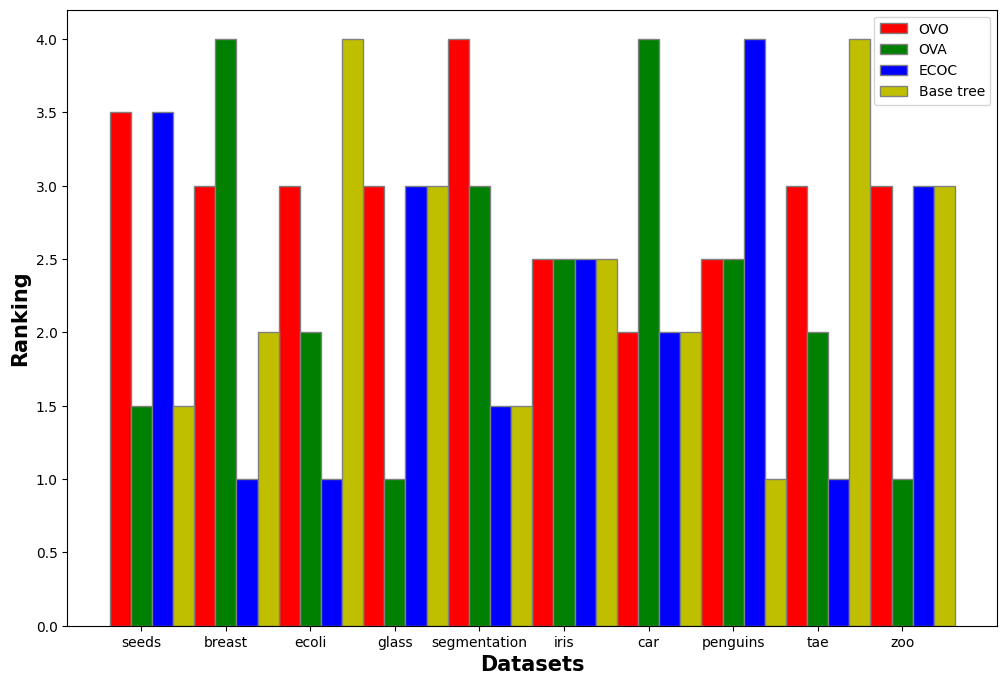

In [219]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = df_ranks['OVO'].values
ECE = df_ranks['OVA'].values
CSE = df_ranks['ECOC'].values
CSA = df_ranks['Modelo base'].values

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='OVO')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='OVA')
plt.bar(br3, CSE, color ='b', width = barWidth,
		edgecolor ='grey', label ='ECOC')
plt.bar(br4, CSA, color ='y', width = barWidth,
		edgecolor ='grey', label ='Base tree')

# Adding Xticks
plt.xlabel('Datasets', fontweight ='bold', fontsize = 15)
plt.ylabel('Ranking', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		df_ranks.index.values)

plt.legend()
plt.show()

In [221]:
ranks = df_ranks.values

print(ranks)

avg_ranking = [np.sum(ranks[:, 0]) / ranks.shape[0], np.sum(ranks[:, 1]) / ranks.shape[0], np.sum(ranks[:, 2]) / ranks.shape[0], np.sum(ranks[:, 3]) / ranks.shape[0]]
print(avg_ranking)

[[3.5 1.5 3.5 1.5]
 [3.  4.  1.  2. ]
 [3.  2.  1.  4. ]
 [3.  1.  3.  3. ]
 [4.  3.  1.5 1.5]
 [2.5 2.5 2.5 2.5]
 [2.  4.  2.  2. ]
 [2.5 2.5 4.  1. ]
 [3.  2.  1.  4. ]
 [3.  1.  3.  3. ]]
[2.95, 2.35, 2.25, 2.45]


In [222]:
def nemenyi_critical_distance(num_groups, alpha=0.05):
    """
    Calculates the critical distance for the Nemenyi test.
    --------------
    num_groups : int
        The number of groups being compared.
    alpha : float, optional
        The desired level of statistical significance (default is 0.05).
    --------------
    Returns
    cd : float
        The critical distance for the Nemenyi test.
    """
    from scipy.stats import f
    q = f.ppf(1 - alpha, num_groups - 1, num_groups * (num_groups - 1))
    cd = (q * num_groups * (num_groups + 1)) / (6 * (num_groups - 1))
    return cd


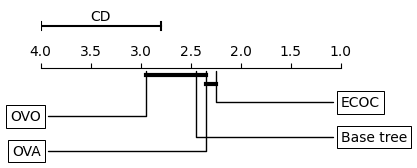

In [231]:
import matplotlib.pyplot as plt

# input data
cd = 1.2
c = 2.95
ccf = 2.35
cmcf = 2.25
shit = 2.45

limits=(4,1)

fig, ax = plt.subplots(figsize=(5,1.8))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k")
ax.text(limits[0]-cd/2., 0.92, "CD", ha="center", va="bottom")

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90", color='black')
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate("OVO", xy=(c, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate("OVA", xy=(ccf, 0.6), xytext=(0,0),ha="right",  **kw)
ax.annotate("ECOC", xy=(cmcf, 0.6), xytext=(1.,0.35),ha="left",  **kw)
ax.annotate("Base tree", xy=(shit, 0.6), xytext=(1.,0.1),ha="left",  **kw)

#bars
ax.plot([ccf,c],[0.55,0.55], color="k", lw=3)
ax.plot([ccf,cmcf],[0.48,0.48], color="k", lw=3)

plt.show()
